## Introduction to Data Science

The main tasks were devided into two parts:
1. Task 1: to make the fitting of the income distribution (one-variable dataset)
2. Task 2: to show the different fits for two-variable dataset (with two different parameters-variables)

See more details from Big data course LPI
https://github.com/Big-data-course-CRI


# **Task 1**
* Use a linear regression to compute the exponent of the power law of
the income distribution.
- Show the resulting regression as a red line on the plot on the left.
* Then do the same for the Complementary cumulative distribution
function.

# Data
We will first load the data, which we worked with in #week1 from single variable analysis

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pandas as pd

In [4]:
# load real data from the incomes

datademographic = np.loadtxt('./demographics.csv', skiprows=1, delimiter=',', dtype=int) # Success!
datademographic.dtype


#. we will need just one column from the data
# let us open it as pandas dataframe

import pandas as pd
#datademographic = np.loadtxt('demographics.csv') # First attempt to load data

dfdemo = pd.DataFrame(datademographic)
dfdemo.head()






,0,1,2,3,4,5
0,1,1,0,41,40367,0
1,2,1,0,54,45084,0
2,3,1,0,42,52483,0
3,4,1,0,40,40941,0
4,5,1,0,46,50289,0


149997
(array([ 9, 10, 11]),)


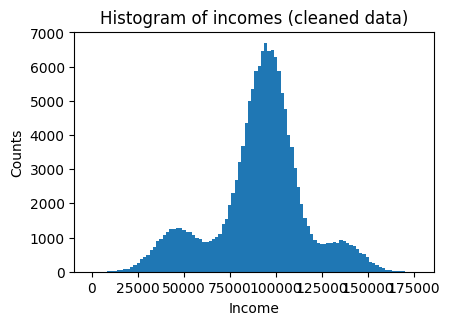

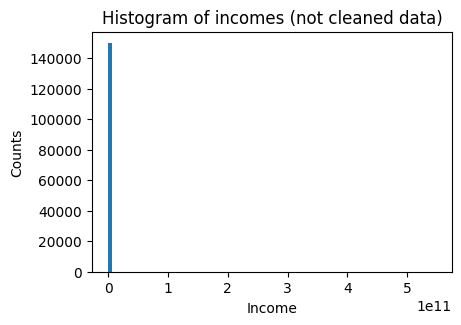

In [9]:
# cleaning the data

mask = (datademographic[:,4] < 10 ** 11)
print(np.count_nonzero(mask))
print(np.where(mask == False))

datademographic_cleaned = datademographic[mask,:]
datademographic_cleaned.shape # double-check


fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0.2, 0.2, 0.6, 0.6]) # left, bottom, width, height (range 0 to 1)
axes.hist(datademographic_cleaned[:,4], 100); # The second argument sets the number of bins.

axes.set_xlabel('Income')
axes.set_ylabel('Counts')
axes.set_title('Histogram of incomes (cleaned data)');


fig = plt.figure(figsize=(6, 4))
axes = fig.add_axes([0.2, 0.2, 0.6, 0.6]) # left, bottom, width, height (range 0 to 1)
axes.hist(datademographic[:,4], 100); # The second argument sets the number of bins.

axes.set_xlabel('Income')
axes.set_ylabel('Counts')
axes.set_title('Histogram of incomes (not cleaned data)');

# Random data

Let us try first to find the dependency on the random data.

In [7]:
# fake data that somewhat models real income distributions
#  skewed to the right because there is a small number of people that have very large incomes and a lot of people with very small income (typically)
# recalling Pareto law


np.random.seed(seed=10)
incomes = 10000*(1+np.random.pareto(1.0, 1000))
incomes = incomes.astype(int)

Plotting the simulated data

Check how plotting and choosing the boxes for plotting may influence plotting.

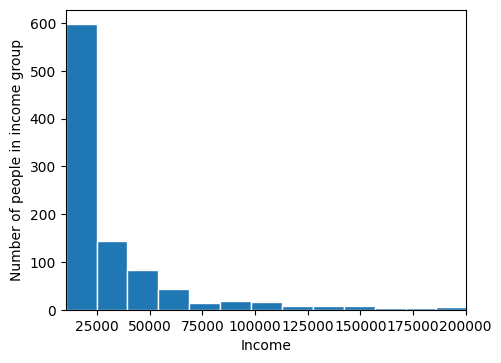

In [10]:
# plotting the data
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.hist(incomes, 500, edgecolor="w")
axes.set_xlim([10000,200000])
axes.set_xlabel("Income")
axes.set_ylabel("Number of people in income group");

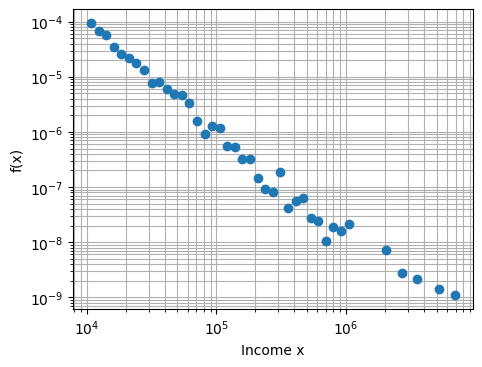

In [11]:
# log-log plot of the probability density function of the income distribution
# this gives us a better understanding of the data
# before we weren't able to conclude anything from the right tail
# now we can, since the logarithmic transformation reduces the difference between very large and small incomes
# the bins, the y and the x axis are all transformed with log

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

minx = min(incomes)
maxx = max(incomes)
num_bins = 50
logbins = np.logspace(np.log10(minx), np.log10(maxx), num_bins)

h, binedges = np.histogram(incomes,  bins=logbins, density=True)
binmidpoints = (binedges[1:] + binedges[:-1]) / 2
axes.plot(binmidpoints, h, "o")
axes.set_xlabel("Income x")
axes.set_ylabel("f(x)");
# display the x and y axes on a logarithmic scale with matplotlib
axes.set_xscale('log')
axes.set_yscale('log')
axes.grid(True,which="both",ls="-")

From the previous graph, we can conclude that with logarithmic transformation we turned the power law distribution into a linear one. This means that we can find a best-fit line that goes through the data points with the smallest error possible. The process of finding this line is called **linear regression**. The slope of that line is also the exponent of the power law distribution (as seen when we take the log of both sides of a power function). We should calculate this exponent to get more insight into our data.
On this graph, we can already see that the slope is a negative number. This means that as the independent variable x increases, the dependent variable y tends to decrease (more people with lower incomes).

a) Use a linear regression to compute the exponent of the power law of the income distribution.

 To find the exponent: we need to do a log transformation of the data,
 find the function for the linear regression line and from it conclude the slope (the exponent)

 as shown on the previous graph, the x-axis contains the bin midpoints (averages of the lower and upper limit of each bin)

 y-axis contains the histogram densities, proportion of data points that fall into each bin (numbers from 0 to 1)

 we need to log transform both the x and the y vvalues (which we did before by using matplotlib built in function to visualize log transformed axes)

 now we can use numpy's built in function for calculating the 10 based logarithm of x and y values

 since log(0) doesn't exist, and histogram values for some bins are zero (as seen on previous graph), the logarithm of those values will be NaN

  therefore, to avoid NaN values that cannot be used for linear regression, we will only calculate the logs for y (h) values not equal to 0 (by filtering them out)


In [13]:

valid_boolean_mask = h != 0
# print(valid_boolean_mask)
log_x_values = np.log10(binmidpoints[valid_boolean_mask])
valid_h = h[valid_boolean_mask]
log_y_values = np.log10(valid_h)

# after the log transformation of x and y values, we can perform linear regression on the transformed data
# we do this with linregress from the scipy.stats module
# with lingress, we can calculate the slope, intercept, the correlation coefficient r, p value and standard error of the estimated slope

slope, intercept, r_value, p_value, std_err = stats.linregress(log_x_values, log_y_values)

# finally, the exponent of the power law is the same as the slope of the linear regression line
print(f"Exponent: {slope:.2f}")

Exponent: -1.84


So, the exponent of the powerlaw is -1,84 which is quite high. When the x values or the incomes increase, there is a steep decline in the y values or the number of individuals. Very few individuals have very high incomes, while a larger portion of the population has lower incomes.

# Plotting the fit
b) Show the resulting regression as a red line on the plot on the left.

We can calculate the regression line y=a+bx with the slope b and the intercept a that we already calculated
exponentiate with base 10 to return to original scale, because x and y values are showed on the plot in their original scales.


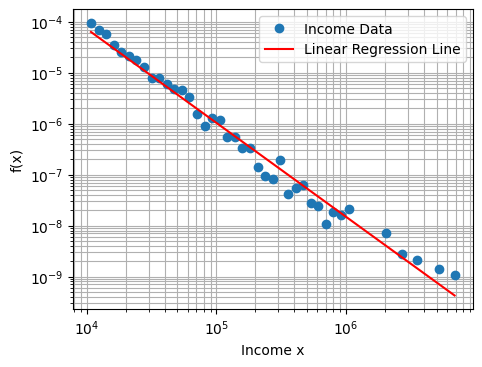

In [14]:

regression_line = 10**(intercept + slope * np.log10(binmidpoints))

# we can plot it with matplotlib like we did before
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(binmidpoints, h, "o", label="Income Data")
axes.set_xlabel("Income x")
axes.set_ylabel("f(x)")
axes.set_xscale('log')
axes.set_yscale('log')
axes.grid(True, which="both", ls="-")
axes.plot(binmidpoints, regression_line, 'r-', label=f'Linear Regression Line')
axes.legend()
plt.show()

The **Cumulative distribution function** is the probability that a variable
$ X $ is smaller than or equal to a value $x$. The **Complementary cumulative distribution function** (CCDF) it is its inverse function, defined as $ P(X ≥ x)$.

Visualising the CCDF will give us more information about our rightly skewed data since it shows the probabilities of extreme values. Examining the CCDF plot will help us understand the distribution of high incomes. We can calculate the CCDF by using this formula in a sorted dataset:
$$ CCDF(x_i) = 1 - \frac{i}{n} $$

where $i$ is the index of the income value $x_i$ and $n$ is the total number of data points.


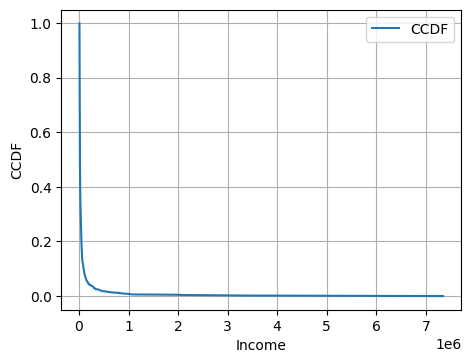

In [15]:
# Plotting the CCDF without log transformation of the data

sorted_incomes = np.sort(incomes)
ccdf = 1 - np.arange(1, len(sorted_incomes) + 1) / len(sorted_incomes)

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(sorted_incomes, ccdf, label="CCDF")
axes.set_xlabel("Income")
axes.set_ylabel("CCDF")
axes.grid(True, which="both", ls="-")
axes.legend()

plt.show()

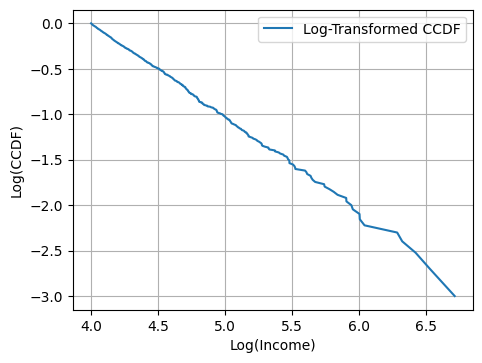

In [16]:
#  c) Then do the same for the Complementary cumulative distribution function.

# we will again transform the data with log, so we can better visualize the incomes
# skip values where ccdf is 0 because there is no log of zero

valid_boolean_mask = ccdf != 0
log_ccdf_x_values = np.log10(sorted_incomes[valid_boolean_mask])
log_ccdf_y_values = np.log10(ccdf[valid_boolean_mask])

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(log_ccdf_x_values, log_ccdf_y_values, label="Log-Transformed CCDF")
axes.set_xlabel("Log(Income)")
axes.set_ylabel("Log(CCDF)")
axes.grid(True, which="both", ls="-")
axes.legend()

plt.show()

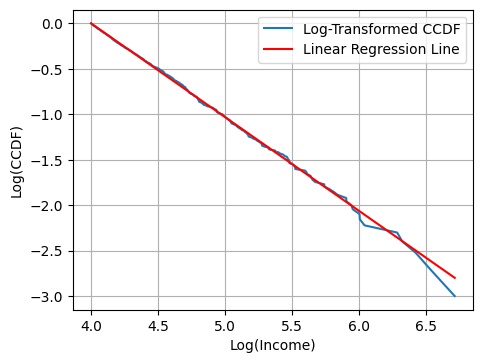

Slope of the log CCDF regression line: -1.03


In [17]:
# Plot the regression line and print its slope (or the exponent of the power law)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_ccdf_x_values, log_ccdf_y_values)

regression_line = intercept + slope * log_ccdf_x_values
# the regression line remains in log space, because the x and the y values on the plot also represent the logarithms of the original x (incomes) and y values (ccdf)

fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

axes.plot(log_ccdf_x_values, log_ccdf_y_values, label="Log-Transformed CCDF")

axes.plot(log_ccdf_x_values, regression_line, 'r-', label=f'Linear Regression Line')

axes.set_xlabel("Log(Income)")
axes.set_ylabel("Log(CCDF)")
axes.grid(True, which="both", ls="-")
axes.legend()

plt.show()

print(f"Slope of the log CCDF regression line: {slope:.2f}")

The slope of the log-transformed CCDF regression line is -1.03 so it has a slower decline compared to the probability density function slope of -1.84.The CCDF exhibits a power law distribution, where the probability of having an income greater than or equal to a certain value decreases more slowly. A small fraction of the population holds a significant portion of total income so they influence overall wealth distribution.

# **Task 2**

* Using a statistical test, find the optimal threshold BMI where there is significant increase of charges for smokers. This defines 2
categories (low BMI smokers and high BMI smokers)
* Show the regression fits for these two categories.
* Create a barplot showing the mean and standard error of charges for
the two categories. Compute the relevant statistical test and print the
result of the estimate and p-value.
* OPTIONAL Plot a ROC curve showing the classification of the two
categories (high BMI vs low BMI) by charges. Compute the AUC, the
corresponding statistical test and report the estimate and p-value.

For this task, we are going to use the insurance.csv dataset found on Kaggle. This data set contains demographic information about individuals (age, sex, bmi - body mass index), num of children, where they live (region), whether they smoke, and how much they pay for health insurance (charges).

In [18]:
# if the dataset is saved in the files folder
# creating a dataframe to easily manipulate data

# Data set downloaded from: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1
!head insurance.csv

df = pd.read_csv('insurance.csv')

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [21]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

masksmoker = (df['smoker'] == 'yes')

# Plot data
axes.scatter(df['bmi'][~masksmoker], df['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(df['bmi'][masksmoker], df['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

# Plot fits
slope, intercept, r_value, _, _ = stats.linregress(df['bmi'][~masksmoker], df['charges'][~masksmoker])
axes.plot(df['bmi'][~masksmoker], slope * df['bmi'][~masksmoker] + intercept, linewidth=2.5, color='orange', label='Fit nonsmoker')
axes.text(45, 13000, "r = " + str(round(r_value, 3)))
slope, intercept, r_value, _, _ = stats.linregress(df['bmi'][masksmoker], df['charges'][masksmoker])
axes.plot(df['bmi'][masksmoker], slope * df['bmi'][masksmoker] + intercept, linewidth=2.5, color='k', label='Fit smoker')
axes.text(42, 58000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

The previous plot shows us that smokers (black) and non-smokers (orange) are treated differently for insurance purposes. The correlation index for smokers is 0.806 which is a high positive r value (close to 1). This means, as the BMI is bigger for the smokers, the charges are bigger as well. The correlation index is much smaller for non-smokers so the BMI and chargers are not that closely related (have a weaker linear relationship). We can separate the smokers and the nonsmokers to continue analysing the data.

In [22]:
# Scatter plot for BMI on the x-axis and the charges on the y-axis for smokers
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

smokers = df[df['smoker'] == 'yes']

axes.scatter(smokers['bmi'], smokers['charges'], color='k', label="Data smoker", edgecolors='w');

slope, intercept, r_value, _, _ = stats.linregress(smokers['bmi'], smokers['charges'])
axes.plot(smokers['bmi'], slope * smokers['bmi'] + intercept, linewidth=2.5, color='k', label='Fit smoker')
axes.text(42, 58000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

In [23]:
# a) Using a statistical test, find the optimal threshold BMI where there is significant increase of charges for smokers.
# This defines 2 categories (low BMI smokers and high BMI smokers)

# We are going to use the T-test to find that value of the BMI so we can separate the previous scatterplot in to two groups
# we do this because the charges depend on both the fact if the person is a smoker or non-smoker but also on their body mass

def t_test(df, threshold):
    low_bmi = smokers[smokers['bmi'] < threshold]['charges']
    high_bmi = smokers[smokers['bmi'] >= threshold]['charges']
    t_stat, p_value = stats.ttest_ind(low_bmi, high_bmi, equal_var=False)
    return p_value

thresholds = np.arange(25, 45, 0.1)
p_values = []

# We can test different thresholds in the range of 20 to 50 with the step of 0.1
# from the graph we can already conclude that the bmi threshold is close to 30
# with the t-test function, we will test each threshold to find the optimal one
# the optimal one has the smallest p value
# null hypothesis: no significant difference in insurance charges between smokers with low and high BMI
# high p-value (close to 1): we cannot reject the null hypothesis
# low p-value (≤ 0.05): we reject the null hypothesis

# c) Compute the relevant statistical test and print the result of the estimate and p-value.

for threshold in thresholds:
    p_value = t_test(df, threshold)
    p_values.append(p_value)

optimal_threshold_index = np.argmin(p_values)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_p_value = p_values[optimal_threshold_index]

print(f'Optimal BMI threshold: {optimal_threshold:.2f}')
print(f'p-value at this threshold: {optimal_p_value:.4f}')

Optimal BMI threshold: 30.00
p-value at this threshold: 0.0000


The p-value for the BMI threshold of 30 is equal to 0. Since this is the lowest possible p-value, this means that there are obvious differences between smokers with bmi lower and higher than 30. We reject the null hypothesis. We can now separate our graphs based on x=30 to further analyse the data.

In [24]:
# b) Show the regression fits for these two categories
# first category: smokers with bmi lower than 30, second: higher or equal to 30

low_bmi_smokers = smokers[smokers['bmi'] < 30]
high_bmi_smokers = smokers[smokers['bmi'] >= 30]

fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# smokers with BMI < 30
axes[0].scatter(low_bmi_smokers['bmi'], low_bmi_smokers['charges'], color='b', label="Low BMI smokers", edgecolors='w')

slope_low, intercept_low, r_value_low, p_value_low, std_err_low = stats.linregress(low_bmi_smokers['bmi'], low_bmi_smokers['charges'])

axes[0].plot(low_bmi_smokers['bmi'], slope_low * low_bmi_smokers['bmi'] + intercept_low, linewidth=2.5, color='b', label='Fit BMI < 30')

axes[0].legend()
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges')
axes[0].set_title('Smokers with BMI < 30')

# smokers with BMI >= 30
axes[1].scatter(high_bmi_smokers['bmi'], high_bmi_smokers['charges'], color='g', label="High BMI smokers", edgecolors='w')

slope_high, intercept_high, r_value_high, p_value_high, std_err_high = stats.linregress(high_bmi_smokers['bmi'], high_bmi_smokers['charges'])

axes[1].plot(high_bmi_smokers['bmi'], slope_high * high_bmi_smokers['bmi'] + intercept_high, linewidth=2.5, color='g', label='Fit BMI >= 30')

axes[1].legend()
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].set_title('Smokers with BMI >= 30')

plt.tight_layout()
plt.show()


For smokers with a BMI below 30, higher BMI is mostly associated with higher insurance charges (positive correlation between the two variables), but the variation in charges is less extreme compared to the high BMI group which has a steeper regression line. We could print the std error, the slope and the r-value if we wanted a better comparison of the two groups.

In [24]:
# c) Create a barplot showing the mean and standard error of charges for the two categories.
# Compute the relevant statistical test and print the result of the estimate and p-value. (already done)

# mean and standard deviation of charges for low and high BMI smokers
mean_charges_low = low_bmi_smokers['charges'].mean()
std_charges_low = low_bmi_smokers['charges'].std() / np.sqrt(len(low_bmi_smokers['charges']))

mean_charges_high = high_bmi_smokers['charges'].mean()
std_charges_high = high_bmi_smokers['charges'].std() / np.sqrt(len(high_bmi_smokers['charges']))

fig, ax = plt.subplots()
ax.bar(['Smokers with BMI < 30', 'Smokers with BMI >= 30'], [mean_charges_low, mean_charges_high], yerr=[std_charges_low, std_charges_high])
ax.set_ylabel('Mean Charges')
ax.set_title('Mean Charges for Low and High BMI Smokers')
plt.show()

# the p-value we previously calculated
print(f'p-value at threshold 30: {optimal_p_value:.4f}')


# ROC Curve

## Advanced part

As expected, smokers with a higher BMI have a larger mean for insurance charges. The standard error bars in the bar plot show that the mean charges in both groups don't vary much. So if we resampled the data, the mean would be similar again. However, from the scatterplot, we can see that individual charges vary significantly, particularly for the low BMI group, where many data points are not close to the regression line.

If we want to test how well we would classify smokers into the two groups (low and high BMI) only based on their insurance charges, we could plot the ROC curve and compute AUC - the area under it. If low BMI smokers are class 0 and high BMI smokers are class 1, a classifier model can make true positives (successfully classified high BMI smokers), false positives (low BMI classified as high BMI), true negatives (successfully classified low BMI) and false negatives (high BMI classifed as low BMI). The ROC and AUC give us more insight into that kind of data.

In [24]:
# d) Plot a ROC curve showing the classification of the two categories by charges.

from sklearn.metrics import roc_curve, roc_auc_score

# low bmi smokers are class 0, high bmi are class 1. these are the true labels
labels = np.concatenate((np.zeros(len(low_bmi_smokers)), np.ones(len(high_bmi_smokers))))

# the predicted scores
# higher charges are expected for higher bmi smokers, and lower charges are for lower bmi smokers
scores = np.concatenate((low_bmi_smokers['charges'], high_bmi_smokers['charges']))

false_positive_rate, true_positive_rate, thresholds = roc_curve(labels, scores)

fig, ax = plt.subplots()
ax.plot(false_positive_rate, true_positive_rate)

# baseline for random guessing
ax.plot([0, 1], [0, 1], 'k--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
plt.show()

In [ ]:
#  d) Compute the AUC, the corresponding statistical test and report the estimate and p-value.

auc = roc_auc_score(labels, scores)
print(f'AUC: {auc:.2f}')

# z-test to be sure that the classifications have not been done just randomly
# for the z-score formula we need to calculate the standard error of the AUC
n1 = len(low_bmi_smokers)
n2 = len(high_bmi_smokers)
q1 = auc / (2 - auc)
q2 = 2 * auc**2 / (1 + auc)
se_auc = np.sqrt((auc * (1 - auc) + (n1 - 1) * (q1 - auc**2) + (n2 - 1) * (q2 - auc**2)) / (n1 * n2))

z = auc / se_auc

# calculate the p-value as well for a two tail z test
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
print(f'p-value: {p_value:.4f}')

AUC: 0.99
p-value: 0.0000


Since the AUC is close to 1 and the p-value of the z test is zero, we can conclude that the test didn't classify the smokers into low and high BMI groups randomly and that they can be classified well based on their insurance charges. So, there is a clear difference between the groups and the bigger the charges, the bigger the BMI.